In [56]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [57]:
pca_df = pd.read_csv(r"C:\Users\44798\OneDrive\Documents\LSE YEAR 1\DS105\environmentalkuznets\data\final_dataframe.csv")

In [58]:
#take a look at the dataframe

pca_df.head()


,Unnamed: 0,Country Code,"GNI per capita, Atlas method (current US$)","Labor force, female (% of total labor force)","Life expectancy at birth, total (years)",Population growth (annual %),"Population, total",Poverty headcount ratio at national poverty line (% of population),"Public spending on education, total (% of GDP)",Rural population (% of total population),...,2010 Total:,2011 Total:,2012 Total:,2013 Total:,2014 Total:,2015 Total:,2016 Total:,2017 Total:,2018 Total:,2019 Total:
0,0,AFG,510,21.741485654167413,64.486,2.384309,37171922,..,3.19979000091553,74.505,...,68.96605,66.94454,68.25744,72.18289,68.05715,67.20320,64.00314,61.77561,70.25405,62.48616
1,1,AGO,1900,49.60658575105186,60.782,3.276145,30809787,32.3,2.04470133781433,34.486,...,24.19840,24.67357,24.00830,24.53186,24.11941,25.03078,26.08120,25.44195,25.85236,27.16477
2,2,ALB,4860,42.720264348661246,78.458,-0.246732,2866376,23,..,39.681,...,21.94870,22.99650,21.70175,19.77038,19.13142,18.98271,18.14981,19.00622,19.75808,16.27997
3,3,AND,..,..,..,0.014285,77008,..,3.2467200756073,11.938,...,11.42903,11.66004,10.79727,10.14877,9.34741,9.94171,9.06227,9.30733,9.21394,8.52423
4,4,ARE,41470,16.933394884621272,77.814,1.503938,9630966,..,..,13.478,...,43.70844,43.53498,43.93421,42.88311,41.33546,43.92792,42.88604,43.32676,43.09622,41.74950


In [59]:
#cleaning the dataframe
pca_df.drop(['Unnamed: 0','Poverty headcount ratio at national poverty line (% of population)','Public spending on education, total (% of GDP)','Rural population (% of total population)','School enrollment, primary (% net)'],axis=1,inplace=True)
pca_df.drop([3,7,46,52,59,69,91,92,106,111,130,137,140,155,158,165,177,185],axis=0,inplace=True)


In [60]:
#Dataframe ready for PCA
pca_df.head()

,Country Code,"GNI per capita, Atlas method (current US$)","Labor force, female (% of total labor force)","Life expectancy at birth, total (years)",Population growth (annual %),"Population, total",Urban population (% of total population),2010 Total:,2011 Total:,2012 Total:,2013 Total:,2014 Total:,2015 Total:,2016 Total:,2017 Total:,2018 Total:,2019 Total:
0,AFG,510,21.741485654167413,64.486,2.384309,37171922,25.495,68.96605,66.94454,68.25744,72.18289,68.05715,67.20320,64.00314,61.77561,70.25405,62.48616
1,AGO,1900,49.60658575105186,60.782,3.276145,30809787,65.514,24.19840,24.67357,24.00830,24.53186,24.11941,25.03078,26.08120,25.44195,25.85236,27.16477
2,ALB,4860,42.720264348661246,78.458,-0.246732,2866376,60.319,21.94870,22.99650,21.70175,19.77038,19.13142,18.98271,18.14981,19.00622,19.75808,16.27997
4,ARE,41470,16.933394884621272,77.814,1.503938,9630966,86.522,43.70844,43.53498,43.93421,42.88311,41.33546,43.92792,42.88604,43.32676,43.09622,41.74950
5,ARG,12430,42.982509556851674,76.52,1.015808,44494502,91.870,13.13748,13.22056,12.94834,14.01846,13.56491,14.18288,13.93109,13.23692,12.60073,12.04087


In [61]:
pca_df.reset_index(drop=True, inplace=True)

In [62]:
pca_df.head()

,Country Code,"GNI per capita, Atlas method (current US$)","Labor force, female (% of total labor force)","Life expectancy at birth, total (years)",Population growth (annual %),"Population, total",Urban population (% of total population),2010 Total:,2011 Total:,2012 Total:,2013 Total:,2014 Total:,2015 Total:,2016 Total:,2017 Total:,2018 Total:,2019 Total:
0,AFG,510,21.741485654167413,64.486,2.384309,37171922,25.495,68.96605,66.94454,68.25744,72.18289,68.05715,67.20320,64.00314,61.77561,70.25405,62.48616
1,AGO,1900,49.60658575105186,60.782,3.276145,30809787,65.514,24.19840,24.67357,24.00830,24.53186,24.11941,25.03078,26.08120,25.44195,25.85236,27.16477
2,ALB,4860,42.720264348661246,78.458,-0.246732,2866376,60.319,21.94870,22.99650,21.70175,19.77038,19.13142,18.98271,18.14981,19.00622,19.75808,16.27997
3,ARE,41470,16.933394884621272,77.814,1.503938,9630966,86.522,43.70844,43.53498,43.93421,42.88311,41.33546,43.92792,42.88604,43.32676,43.09622,41.74950
4,ARG,12430,42.982509556851674,76.52,1.015808,44494502,91.870,13.13748,13.22056,12.94834,14.01846,13.56491,14.18288,13.93109,13.23692,12.60073,12.04087


In [63]:
pca_df.shape

(175, 17)

In [64]:
#PCA test
from sklearn.preprocessing import StandardScaler
features = ['GNI per capita, Atlas method (current US$)','Labor force, female (% of total labor force)','Life expectancy at birth, total (years)','Population growth (annual %)','Population, total','Urban population (% of total population)']

#seperating out the features
x = pca_df.loc[:,features].values

y = pca_df.loc[:,['2010 Total:']].values

#standardize the features
x = StandardScaler().fit_transform(x)

In [65]:
from sklearn.decomposition import PCA, _pca

#standardize the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=6)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents , columns = ['Principal component 1','Principal component 2', 'Principal component 3','Principal component 4','Principal component 5','Principal component 6'])



In [66]:
#concatenating dataframe along axis=1, final_pca_df is the final DataFrame before plotting the data
final_pca_df = pd.concat([pca_df[['Country Code']], principalDf, pca_df[['2010 Total:','2011 Total:','2012 Total:','2013 Total:','2014 Total:','2015 Total:','2016 Total:','2017 Total:','2018 Total:','2019 Total:']]], axis = 1)

In [67]:
final_pca_df.head()

,Country Code,Principal component 1,Principal component 2,Principal component 3,Principal component 4,Principal component 5,Principal component 6,2010 Total:,2011 Total:,2012 Total:,2013 Total:,2014 Total:,2015 Total:,2016 Total:,2017 Total:,2018 Total:,2019 Total:
0,AFG,-2.039390,1.629572,-0.351968,-0.730016,0.977890,0.533165,68.96605,66.94454,68.25744,72.18289,68.05715,67.20320,64.00314,61.77561,70.25405,62.48616
1,AGO,-1.657919,-0.235898,-0.733047,1.344092,-1.080329,-0.068759,24.19840,24.67357,24.00830,24.53186,24.11941,25.03078,26.08120,25.44195,25.85236,27.16477
2,ALB,0.785827,-0.612819,0.540349,-1.250070,-0.126273,-0.328863,21.94870,22.99650,21.70175,19.77038,19.13142,18.98271,18.14981,19.00622,19.75808,16.27997
3,ARE,1.817509,2.346988,-1.076474,-0.306984,0.500062,0.850036,43.70844,43.53498,43.93421,42.88311,41.33546,43.92792,42.88604,43.32676,43.09622,41.74950
4,ARG,1.164092,0.100775,-0.108663,-0.010422,-1.062668,-0.363012,13.13748,13.22056,12.94834,14.01846,13.56491,14.18288,13.93109,13.23692,12.60073,12.04087


In [68]:
final_pca_df.shape

(175, 17)

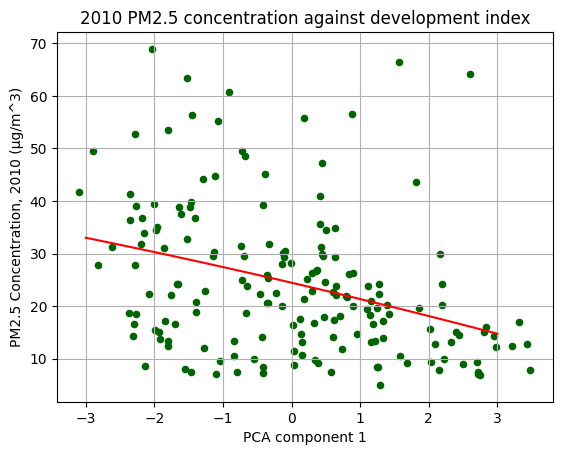

In [69]:
#Polynomial regression on Principal component 1

ax = final_pca_df.plot(kind='scatter', x='Principal component 1', y='2010 Total:', color='DarkGreen')

X = final_pca_df['Principal component 1']
Y = final_pca_df['2010 Total:']

#Fit a degree 2 polynomial
degree = 2
poly_fit = np.poly1d(np.polyfit(X,Y, degree))

# Plot data
xx = np.linspace(-3, 3, 100)
plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
plt.title('2010 PM2.5 concentration against development index')
plt.xlabel('PCA component 1')
plt.ylabel('PM2.5 Concentration, 2010 (μg/m^3)')
plt.grid(True)

plt.show()



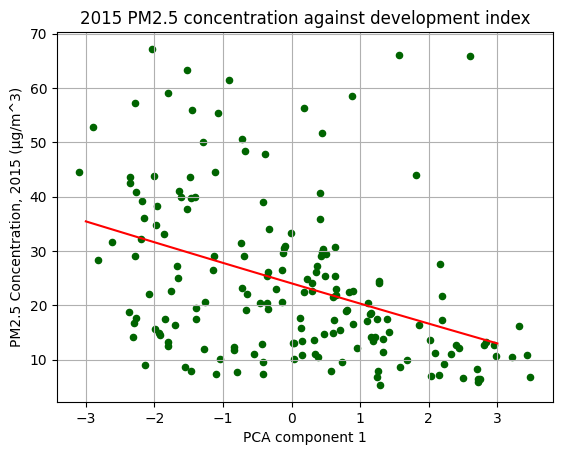

In [70]:
ax = final_pca_df.plot(kind='scatter', x='Principal component 1', y='2015 Total:', color='DarkGreen')

X = final_pca_df['Principal component 1']
Y = final_pca_df['2015 Total:']

# Train Algorithm (Polynomial)
degree = 2
poly_fit = np.poly1d(np.polyfit(X,Y, degree))

# Plot data
xx = np.linspace(-3, 3, 100)
plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
plt.title('2015 PM2.5 concentration against development index')
plt.xlabel('PCA component 1')
plt.ylabel('PM2.5 Concentration, 2015 (μg/m^3)')
plt.grid(True)
plt.show()



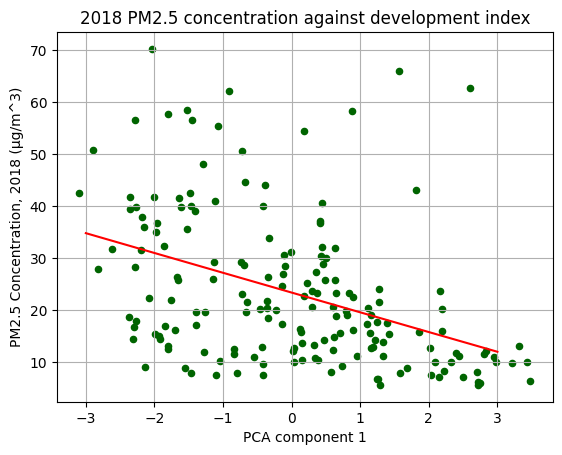

In [71]:
ax = final_pca_df.plot(kind='scatter', x='Principal component 1', y='2018 Total:', color='DarkGreen')

X = final_pca_df['Principal component 1']
Y = final_pca_df['2018 Total:']

# Train Algorithm (Polynomial)
degree = 2
poly_fit = np.poly1d(np.polyfit(X,Y, degree))

# Plot data
xx = np.linspace(-3, 3, 100)
plt.plot(xx, poly_fit(xx), c='r',linestyle='-')
plt.title('2018 PM2.5 concentration against development index')
plt.xlabel('PCA component 1')
plt.ylabel('PM2.5 Concentration, 2018 (μg/m^3)')
plt.grid(True)
plt.show()

In [72]:
#determine explained variance using explained_variance_ratio attribute
pca.explained_variance_ratio_

array([0.4141268 , 0.19455458, 0.17227025, 0.12089498, 0.06233261,
       0.03582078])

In [73]:
sum(pca.explained_variance_ratio_)

1.0

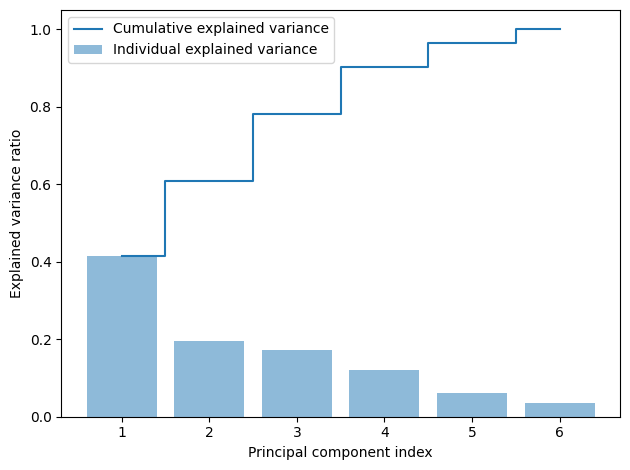

In [74]:
#Cumulative sum of eigenvalues; this will be used to create step plot for visualising the variance explained by each principal component
exp_var_pca = pca.explained_variance_ratio_
cumulative_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_sum_eigenvalues)), cumulative_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.xticks(np.arange(len(exp_var_pca)), np.arange(1,len(exp_var_pca)+1))
plt.show()

In [75]:
reg_df = pd.read_csv(r"C:\Users\44798\OneDrive\Documents\LSE YEAR 1\DS105\environmentalkuznets\data\dataframe_n2.csv")

In [76]:
#seperate out PC1 and PC1 quadratic term 
components_1=['Principal component 1','PC1 squared']
X1 = reg_df.loc[:,components_1].values
y = reg_df.loc[:,'2010 Total:'].values



In [77]:
#generate a OLS results table for 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model = LinearRegression().fit(X1,y)

x2 = sm.add_constant(X1)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     11.83
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           1.54e-05
Time:                        16:24:14   Log-Likelihood:                -697.69
No. Observations:                 175   AIC:                             1401.
Df Residuals:                     172   BIC:                             1411.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4343      1.358     17.988      0.0

In [78]:
#rank regression model: plots
rank_df = pd.read_csv(r'C:\Users\44798\OneDrive\Documents\LSE YEAR 1\DS105\environmentalkuznets\data\rank_data.csv')

In [79]:
rank_df.head()

,Unnamed: 0,Country Code,"GNI per capita, Atlas method (current US$)","Labor force, female (% of total labor force)","Life expectancy at birth, total (years)",Population growth (annual %),"Population, total",Urban population (% of total population),2010 Total:,2011 Total:,...,"GNI per capita, Atlas method (current US$).1",GNI/capita rank,mean adjusted mod rank,Population growth (annual %).1,rank population growth,"Life expectancy at birth, total (years).1",Rank (life expectancy),rank^2,2018 Total:.1,rank (pm2.5)
0,0.0,AFG,510.0,21.741486,64.486,2.384309,37171922.0,25.495,68.96605,66.94454,...,510.0,9.0,79.0,2.384309,41.0,64.0,35.0,1225.0,70.25405,1.0
1,1.0,AGO,1900.0,49.606586,60.782,3.276145,30809787.0,65.514,24.19840,24.67357,...,1900.0,45.0,43.0,3.276145,8.0,61.0,16.0,256.0,25.85236,62.0
2,2.0,ALB,4860.0,42.720264,78.458,-0.246732,2866376.0,60.319,21.94870,22.99650,...,4860.0,84.0,4.0,-0.246732,165.0,78.0,138.0,19044.0,19.75808,86.0
3,3.0,ARE,41470.0,16.933395,77.814,1.503938,9630966.0,86.522,43.70844,43.53498,...,41470.0,155.0,67.0,1.503938,79.0,78.0,134.0,17956.0,43.09622,17.0
4,4.0,ARG,12430.0,42.982510,76.520,1.015808,44494502.0,91.870,13.13748,13.22056,...,12430.0,125.0,37.0,1.015808,109.0,77.0,118.0,13924.0,12.60073,128.0


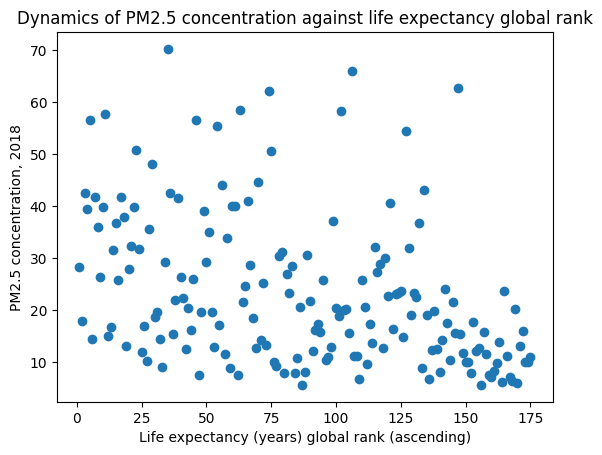

In [80]:
#create a plot of rank [development indicator] against PM2.5 concentration
plt.scatter(rank_df['Rank (life expectancy)'],rank_df['2018 Total:.1'])
plt.ticklabel_format(axis='y',style='plain')
plt.xlabel('Life expectancy (years) global rank (ascending)')
plt.ylabel('PM2.5 concentration, 2018')
plt.title('Dynamics of PM2.5 concentration against life expectancy global rank')
plt.show()

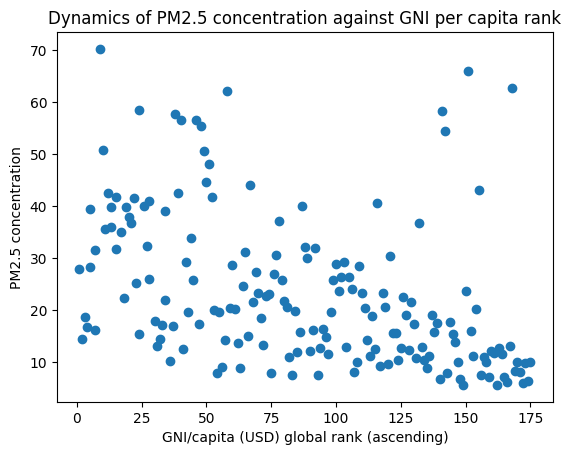

In [81]:
#create a plot of rank [development indicator] against PM2.5 concentration
plt.scatter(rank_df['GNI/capita rank'],rank_df['2018 Total:.1'])
plt.ticklabel_format(axis='y',style='plain')
plt.xlabel('GNI/capita (USD) global rank (ascending)')
plt.ylabel('PM2.5 concentration')
plt.title('Dynamics of PM2.5 concentration against GNI per capita rank')
plt.show()

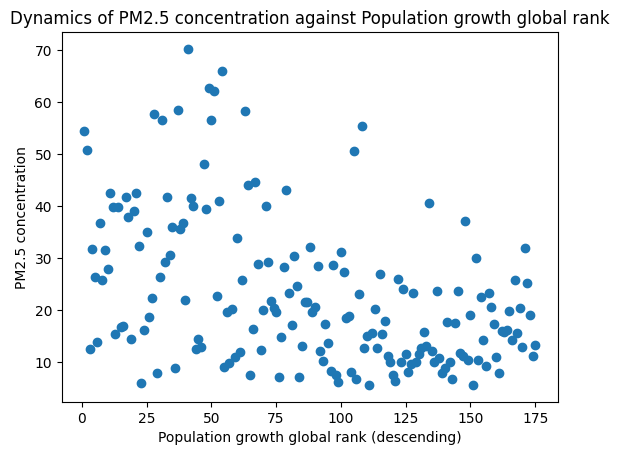

In [82]:
#create a plot of rank [development indicator] against PM2.5 concentration
plt.scatter(rank_df['rank population growth'],rank_df['2018 Total:.1'])
plt.ticklabel_format(axis='y',style='plain')
plt.xlabel('Population growth global rank (descending)')
plt.ylabel('PM2.5 concentration')
plt.title('Dynamics of PM2.5 concentration against Population growth global rank')
plt.show()

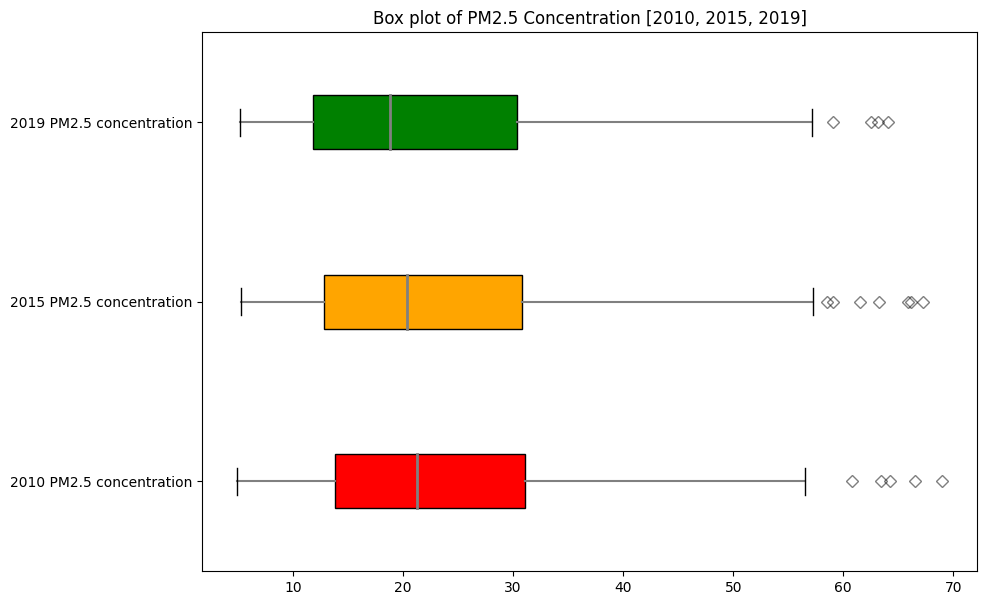

In [85]:
#Create a box plot of PM2.5 concentration, showing the distribution of the data over 3 time intervals (2010, 2015, 2019)
box_df = pd.read_csv(r'C:\Users\44798\OneDrive\Documents\LSE YEAR 1\DS105\environmentalkuznets\data\boxplot_data.csv')

data_1 = (box_df['2010'])
data_2 = (box_df['2015'])
data_3 = (box_df['2019'])

data = [data_1, data_2, data_3]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True, vert = 0)
 
colors = ['red','orange',
          'green']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='grey',
                linewidth = 1.5,
                linestyle ="solid")
 
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='grey', linewidth=2)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='grey',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['2010 PM2.5 concentration', '2015 PM2.5 concentration',
                    '2019 PM2.5 concentration'])
 
# Adding title
plt.title("Box plot of PM2.5 Concentration [2010, 2015, 2019]")

# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

Text(0.5, 1.0, 'Histogram of PM2.5 concentration level 2010-2019')

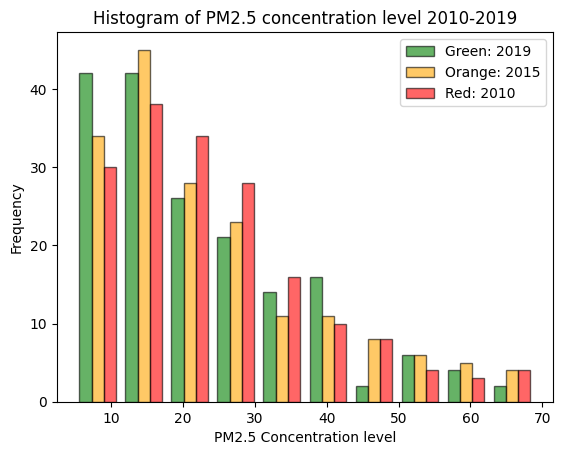

In [86]:
#Plot a histogram of the distribution of the PM2.5 concentration data
plt.hist([data_3, data_2, data_1], bins=10, color=['green','orange','red'], edgecolor='black', alpha=0.6)
#plt.xlim([-1, 10])
plt.xlabel('PM2.5 Concentration level')
#plt.gca().invert_xaxis()
plt.ylabel('Frequency')
plt.legend(labels=['Green: 2019','Orange: 2015','Red: 2010'])
plt.title('Histogram of PM2.5 concentration level 2010-2019')

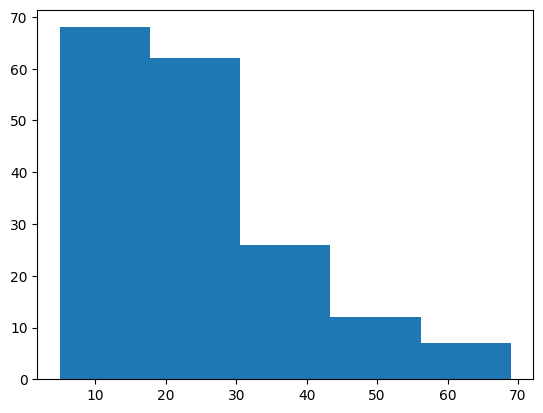

Frequency of each bin: [68 62 26 12  7]


In [87]:
#Find the frequency of each bar to use in a pie chart, repeated across 2010-2015-2019 data
hist, bins = np.histogram(data_1, bins = 5)

plt.hist(data_1, bins=bins)
plt.show()

print("Frequency of each bin:", hist)


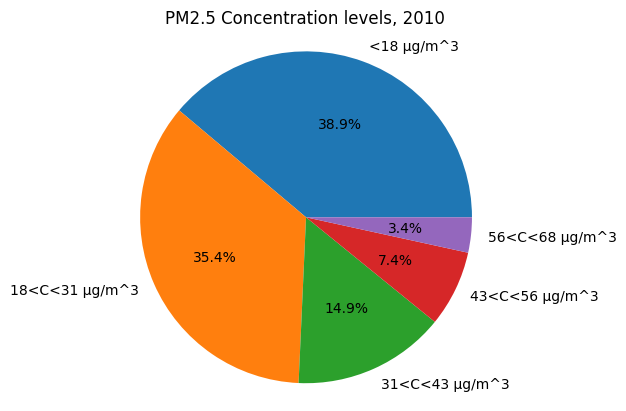

In [88]:
#Create the pie chart using frequency data 

pie_2010 = [68, 62, 26, 13, 6]
pie_2015 = [75, 50, 26, 13, 11]
pie_2019 = [80, 48, 26, 13, 8]

labels = ['<18 μg/m^3', '18<C<31 μg/m^3', '31<C<43 μg/m^3', '43<C<56 μg/m^3','56<C<68 μg/m^3']

# Create the pie chart
plt.pie(pie_2010, labels=labels, startangle=0, autopct='%1.1f%%')

plt.axis('equal')
plt.title('PM2.5 Concentration levels, 2010')
plt.show()

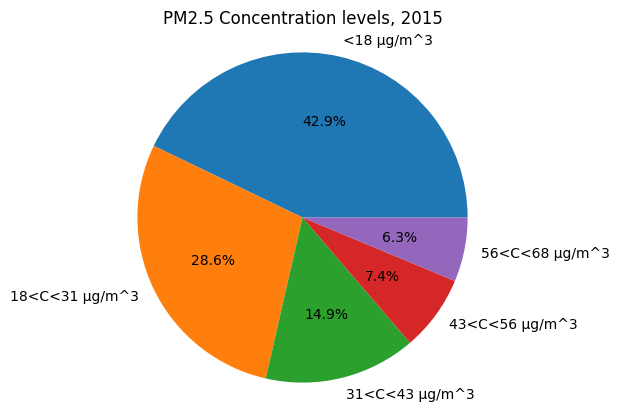

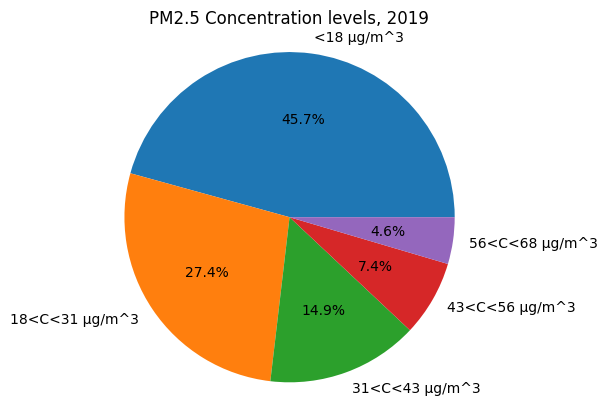

In [89]:
#repeat for 2015 and 2019 data
plt.pie(pie_2015, labels=labels, startangle=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('PM2.5 Concentration levels, 2015')
plt.show()

plt.pie(pie_2019, labels=labels, startangle=0, autopct='%1.1f%%')
plt.axis('equal')
plt.title('PM2.5 Concentration levels, 2019')
plt.show()